In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
numerical_feats = train.dtypes[train.dtypes !="object"].index
print("Number of Numerical features : ", len(numerical_feats))

categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features : ", len(categorical_feats))


Number of Numerical features :  38
Number of Categorical features :  43


Numerical 변수는 38개, Categorical 변수는 43개이다.

In [9]:
print(train[numerical_feats].columns)
print("*"*80)
print(train[categorical_feats].columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

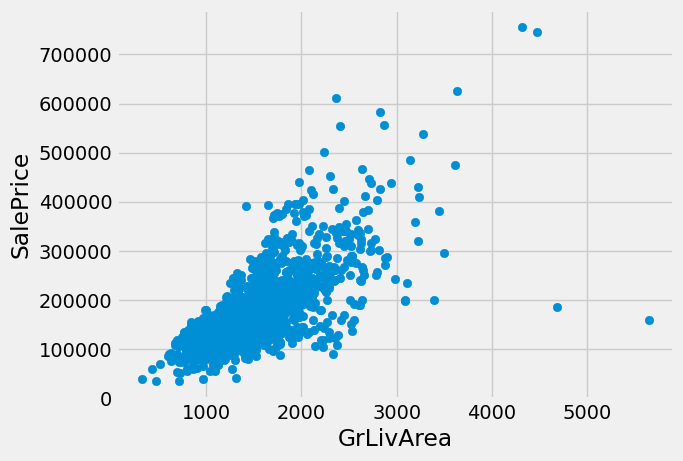

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [11]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['1stFlrSF']>2700) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['2ndFlrSF']>1700) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<600000)].index)

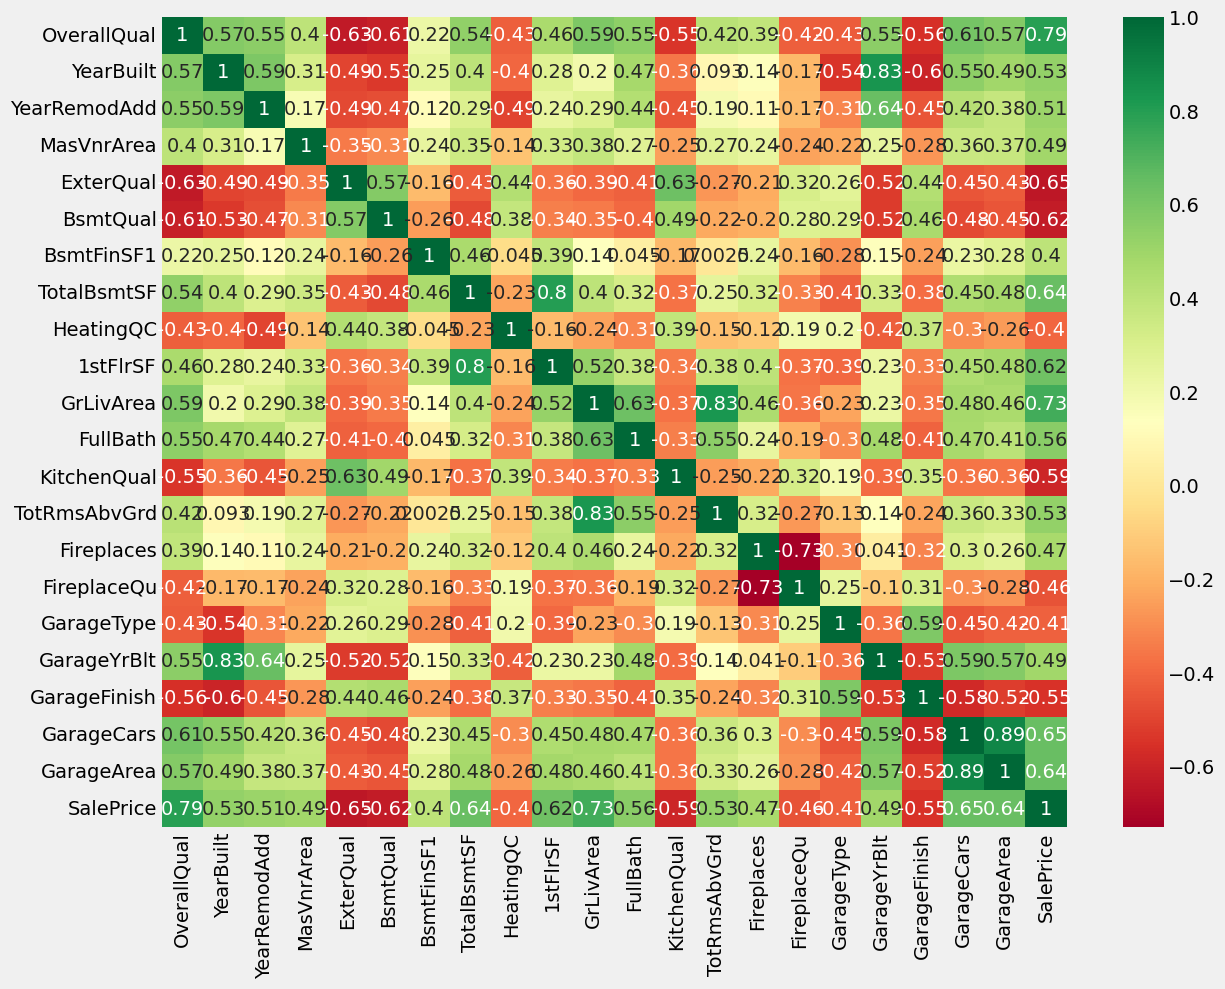

In [13]:
from sklearn.preprocessing import LabelEncoder

# 범주형 데이터 라벨 인코딩
train_encoded = train.copy()
for col in train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[col] = le.fit_transform(train_encoded[col])

# 상관계수 계산
corrmat = train_encoded.corr()
corr_columns = corrmat.index[abs(corrmat["SalePrice"]) >= 0.4]

# 히트맵 시각화
plt.figure(figsize=(13,10))
sns.heatmap(train_encoded[corr_columns].corr(), annot=True, cmap="RdYlGn")
plt.show()

In [14]:
df_train = train.drop('SalePrice', axis=1)
df = pd.concat((df_train,test))

<Axes: xlabel='SalePrice', ylabel='Density'>

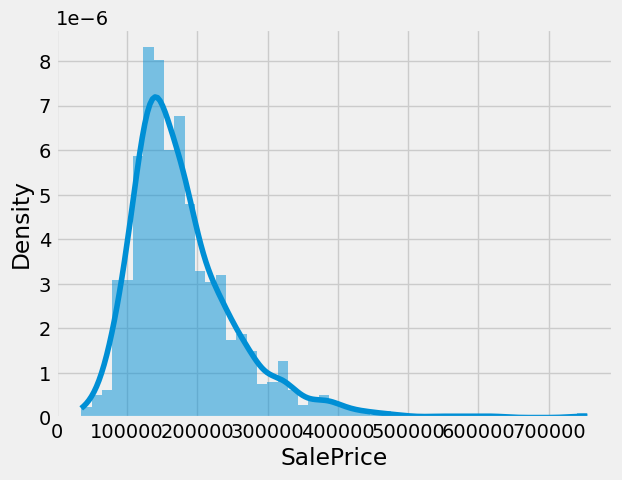

In [15]:
sns.histplot(train['SalePrice'], kde=True, stat="density", linewidth=0)

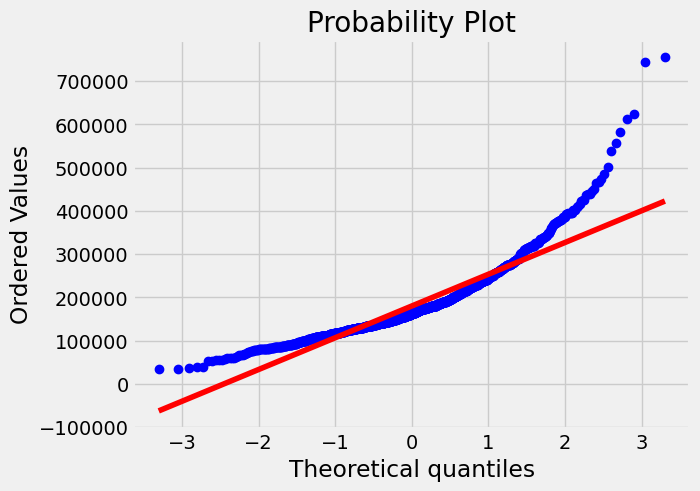

In [16]:
import scipy.stats as stats

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<Axes: xlabel='SalePrice', ylabel='Density'>

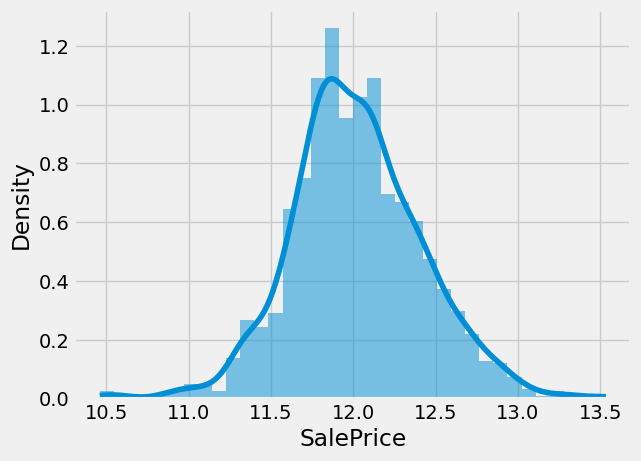

In [17]:
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.histplot(train['SalePrice'], kde=True, stat="density", linewidth=0)

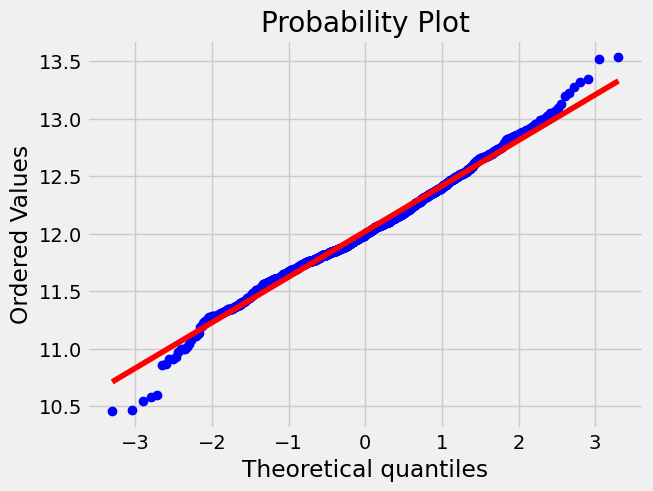

In [18]:
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [19]:
target = train['SalePrice']

In [20]:
null_df = (df.isna().sum() / len(df)) * 100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': null_df})
missing_data.head(20)

Missing Ratio
PoolQC            99.690615
MiscFeature       96.424888
Alley             93.193537
Fence             80.371262
MasVnrType        60.570643
FireplaceQu       48.779649
LotFrontage       16.603644
GarageQual         5.465796
GarageYrBlt        5.465796
GarageCond         5.465796
GarageFinish       5.465796
GarageType         5.397044
BsmtExposure       2.818838
BsmtCond           2.818838
BsmtQual           2.784462
BsmtFinType2       2.715710
BsmtFinType1       2.715710
MasVnrArea         0.790650
MSZoning           0.137504
BsmtFullBath       0.068752

<Axes: xlabel='None'>

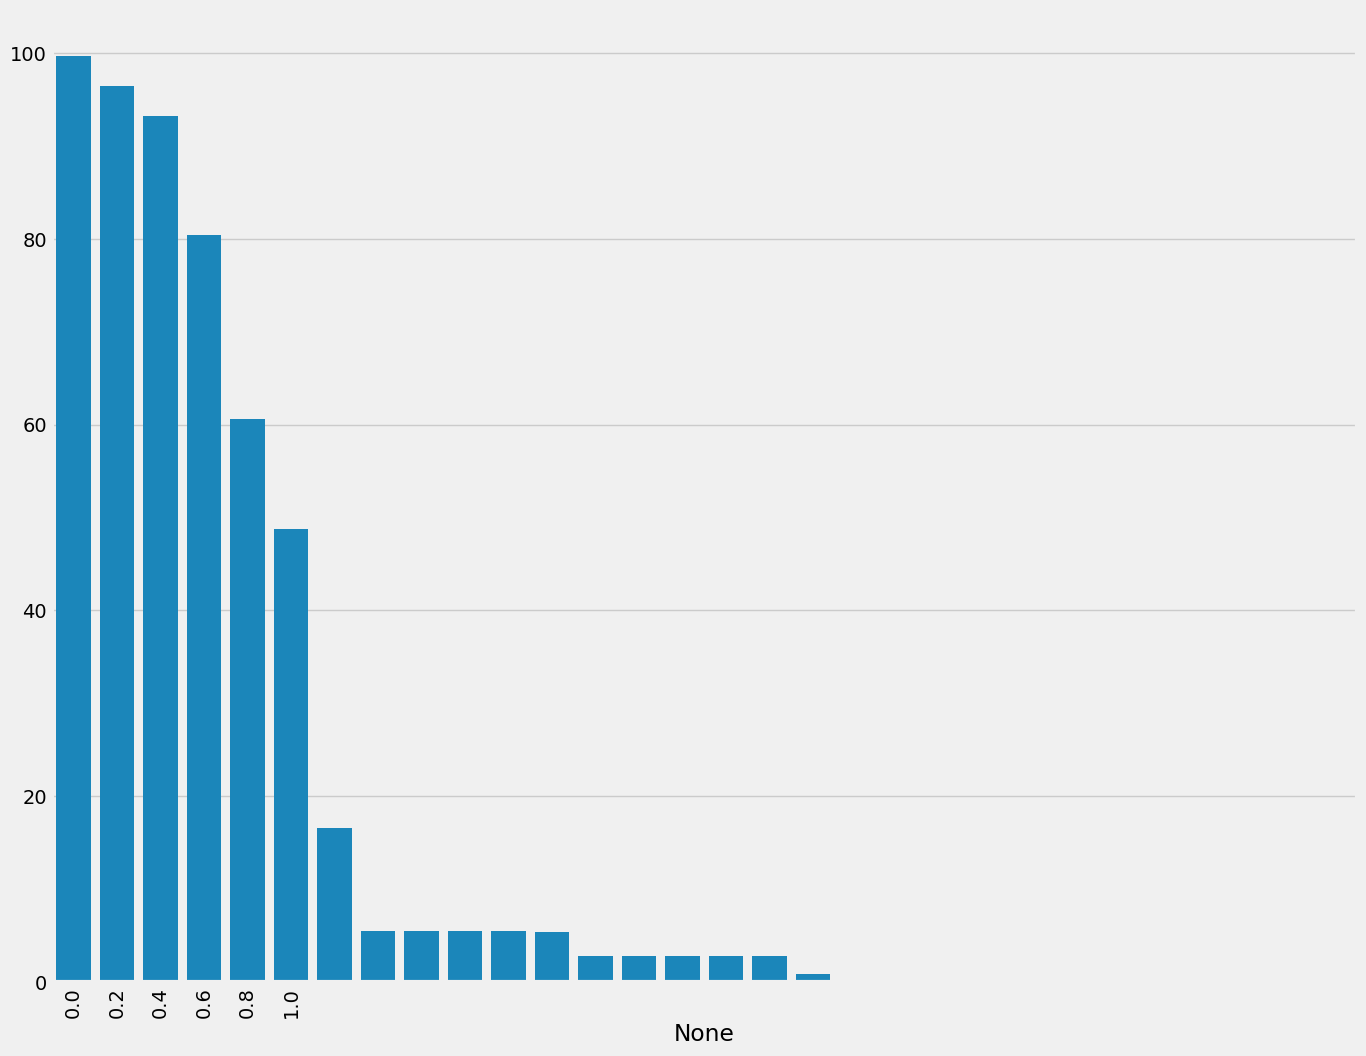

In [21]:
f, ax = plt.subplots(figsize=(15, 12))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x=null_df.index, y=null_df.values)

In [22]:
df["PoolQC"] = df["PoolQC"].fillna("None")
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["Alley"] = df["Alley"].fillna("None")
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df[col] = df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0) 
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)   
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df = df.drop(['Utilities'], axis=1)
df["Functional"] = df["Functional"].fillna("Typ")
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['MSSubClass'] = df['MSSubClass'].fillna("None")

In [23]:
null_df = (df.isna().sum() / len(df)) *100
null_df = null_df.drop(null_df[null_df == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :null_df})
missing_data.head(20)


Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [24]:
#MSSubClass
df['MSSubClass'] = df['MSSubClass'].apply(str)
#OverallCond
df['OverallCond'] = df['OverallCond'].astype(str)
#YrSold,MoSold
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

In [25]:
df_obj = df.select_dtypes(include='object')
df_obj.head(3)

MSSubClass MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL   Pave  None      Reg         Lvl    Inside       Gtl   
1         20       RL   Pave  None      Reg         Lvl       FR2       Gtl   
2         60       RL   Pave  None      IR1         Lvl    Inside       Gtl   

  Neighborhood Condition1  ... GarageQual GarageCond PavedDrive PoolQC Fence  \
0      CollgCr       Norm  ...         TA         TA          Y   None  None   
1      Veenker      Feedr  ...         TA         TA          Y   None  None   
2      CollgCr       Norm  ...         TA         TA          Y   None  None   

  MiscFeature MoSold YrSold SaleType SaleCondition  
0        None      2   2008       WD        Normal  
1        None      5   2007       WD        Normal  
2        None      9   2008       WD        Normal  

[3 rows x 46 columns]

In [26]:
# 명목형 데이터 칼럼들을 list로 저장
li_obj = list(df_obj.columns)

In [27]:
# 수치형 데이터
df_num = df.select_dtypes(exclude = 'object')
df_num.head(3)

Id  LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0   1         65.0     8450            7       2003          2003       196.0   
1   2         80.0     9600            6       1976          1976         0.0   
2   3         68.0    11250            7       2001          2002       162.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageYrBlt  GarageCars  \
0       706.0         0.0      150.0  ...       2003.0         2.0   
1       978.0         0.0      284.0  ...       1976.0         2.0   
2       486.0         0.0      434.0  ...       2001.0         2.0   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       548.0           0           61              0          0            0   
1       460.0         298            0              0          0            0   
2       608.0           0           42              0          0            0   

   PoolArea  MiscVal  
0         0        0  
1         0        0  
2         0        0  

[3 rows x 33 columns]

In [28]:
li_num = list(df_num.columns)

In [29]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lb = LabelEncoder() 
    lb.fit(list(df[c].values)) 
    df[c] = lb.transform(list(df[c].values))

In [30]:
# 파생변수 생성
df['TotalSF'] = (df['TotalBsmtSF'] 
                       + df['1stFlrSF'] 
                       + df['2ndFlrSF'])

df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

df['Total_sqr_footage'] = (df['BsmtFinSF1'] 
                                 + df['BsmtFinSF2'] 
                                 + df['1stFlrSF'] 
                                 + df['2ndFlrSF']
                                )
                                 

df['Total_Bathrooms'] = (df['FullBath'] 
                               + (0.5 * df['HalfBath']) 
                               + df['BsmtFullBath'] 
                               + (0.5 * df['BsmtHalfBath'])
                              )
                               

df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )

In [31]:
df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

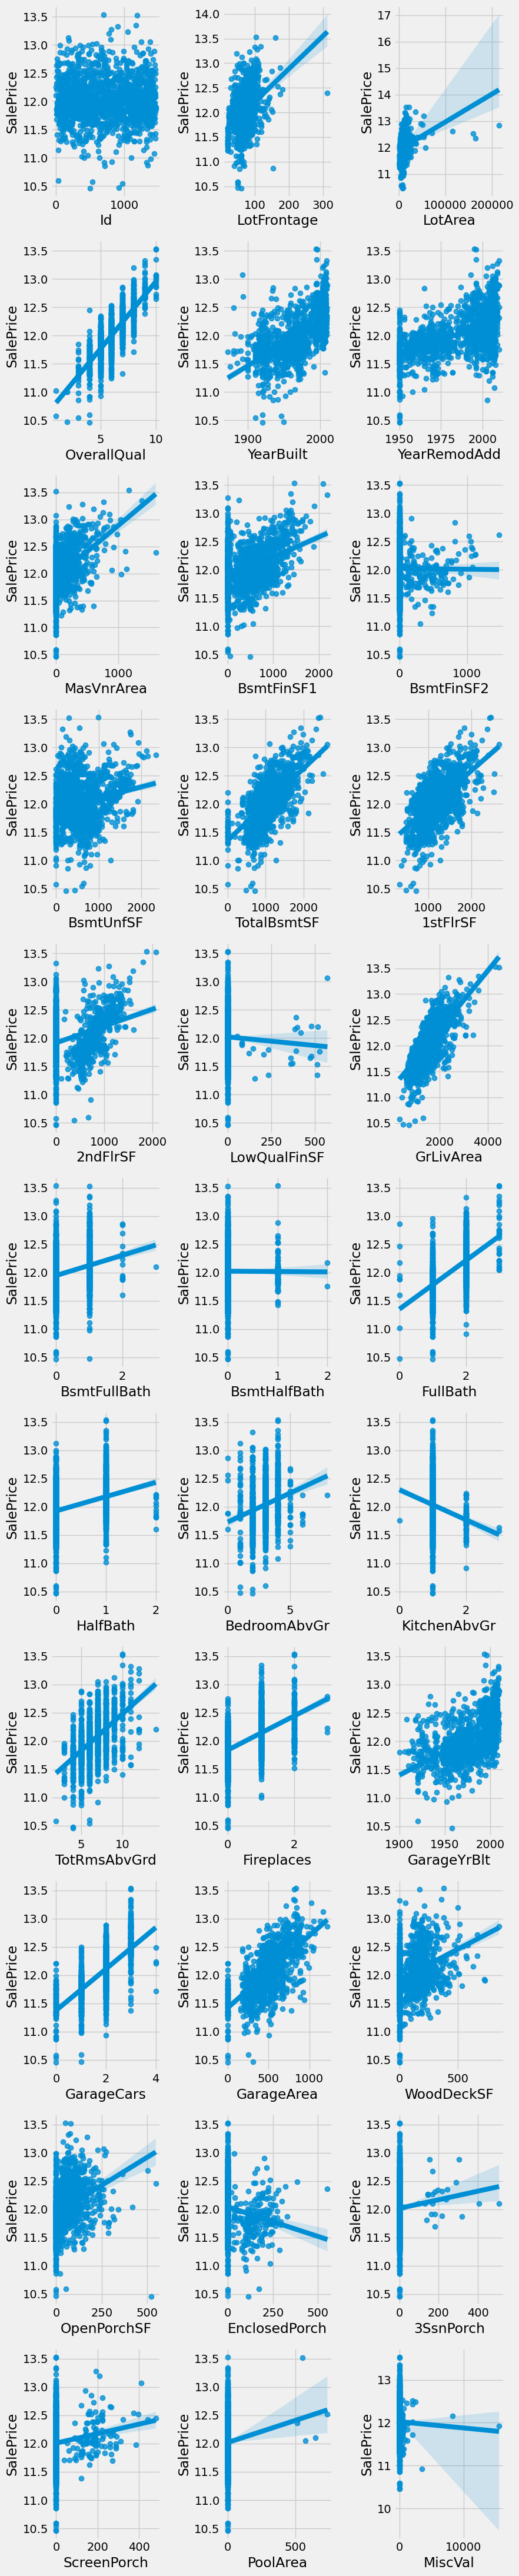

In [32]:
row = 11
col = 3 

fig, axs = plt.subplots(row, col, figsize=(col*3, row*4))

for r in range(0, row):
    for c in range(0, col):
        i = r * col + c
        if i < len(li_num):
            sns.regplot(x=train[li_num[i]], y=target, ax=axs[r][c])
plt.tight_layout()
plt.show()

In [33]:
stats.pearsonr(train[li_num[11]],target)

PearsonRResult(statistic=np.float64(0.6162705311824698), pvalue=np.float64(2.136031407338853e-152))

In [34]:
strong_num = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF',
             'FullBath','TotRmsAbvGrd','GarageYrBlt','GarageCars','GrLivArea']

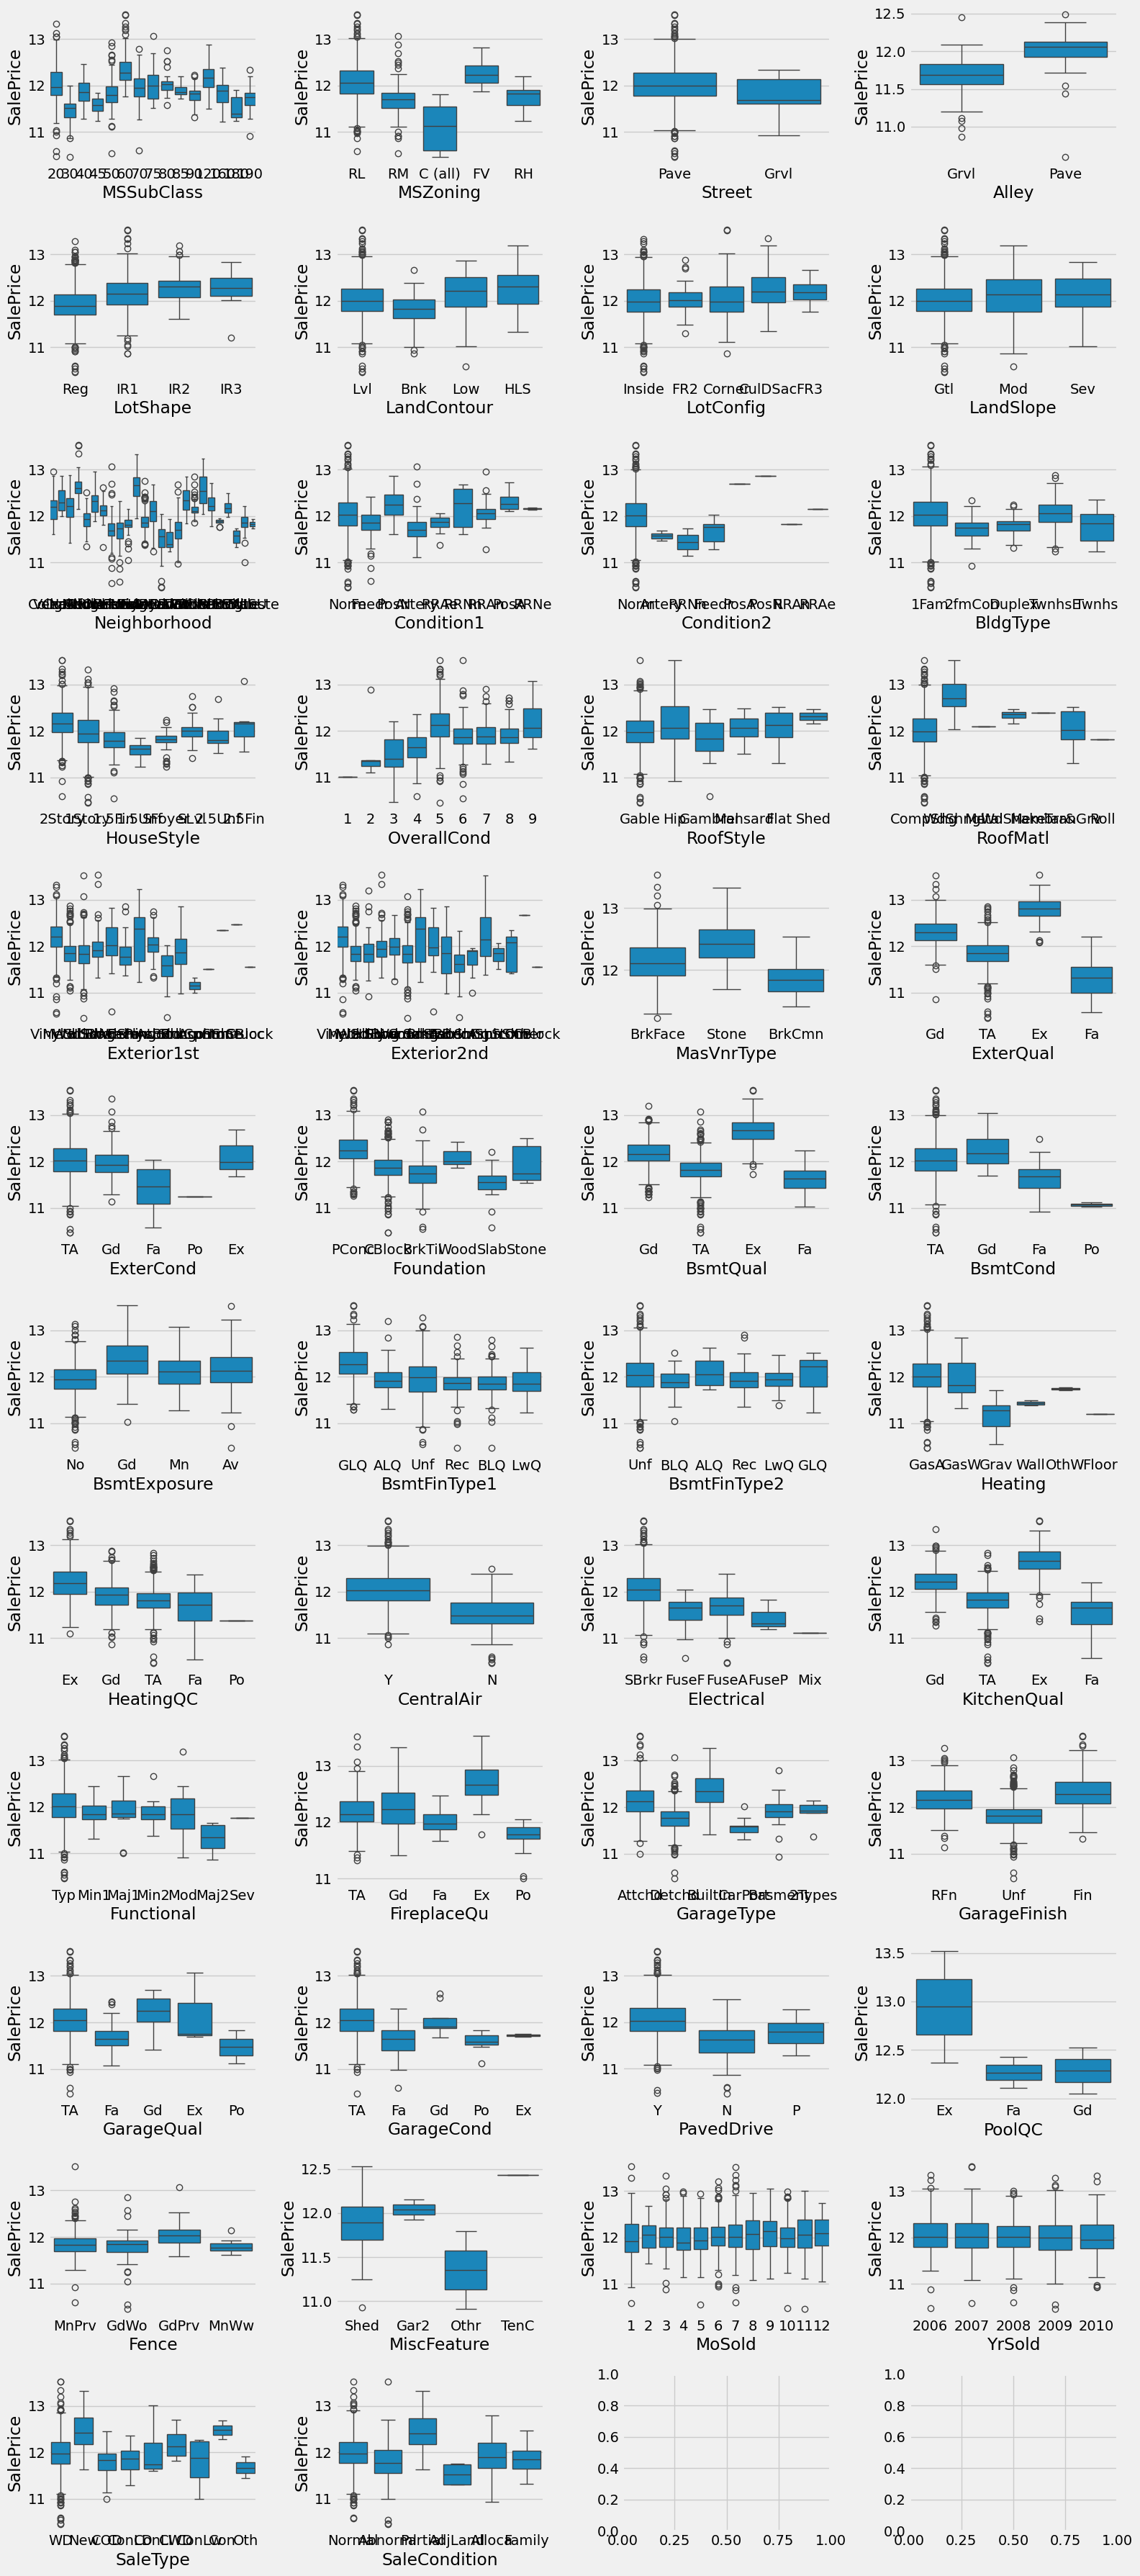

In [35]:
# 범주형 변수 확인
row = 12
col = 4 

fig, axs = plt.subplots(row, col, figsize=(col*4, row*3))

for r in range(0, row):
    for c in range(0, col):
        i = r * col + c
        if i < len(li_obj):
            sns.boxplot(x=train[li_obj[i]], y=target, ax=axs[r][c])
plt.tight_layout()
plt.show()

In [36]:
strong_obj = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

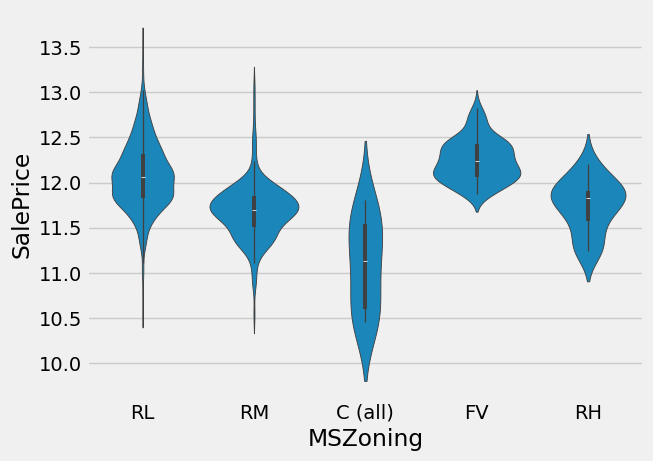

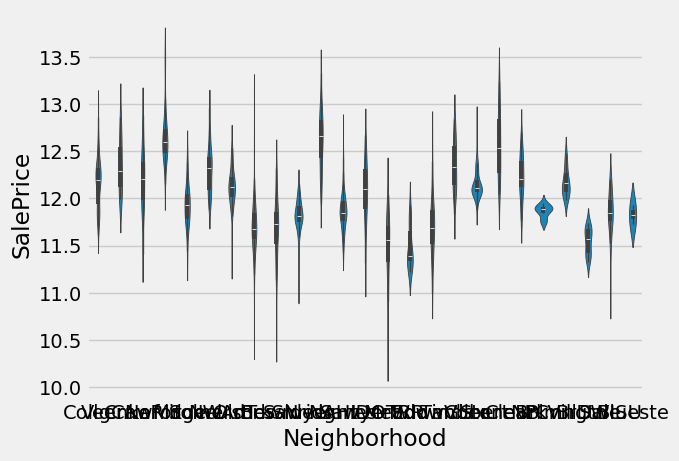

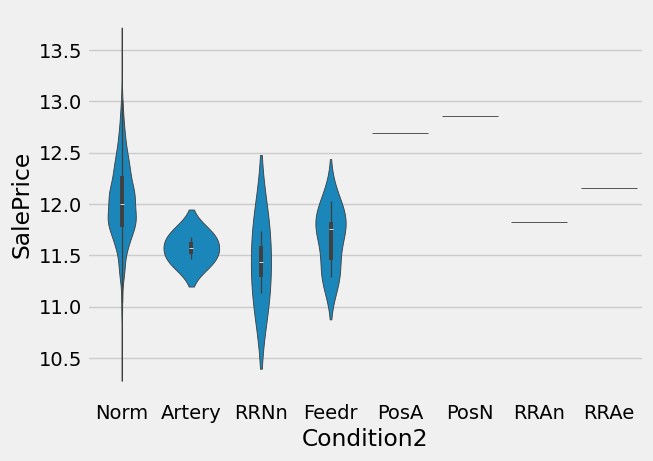

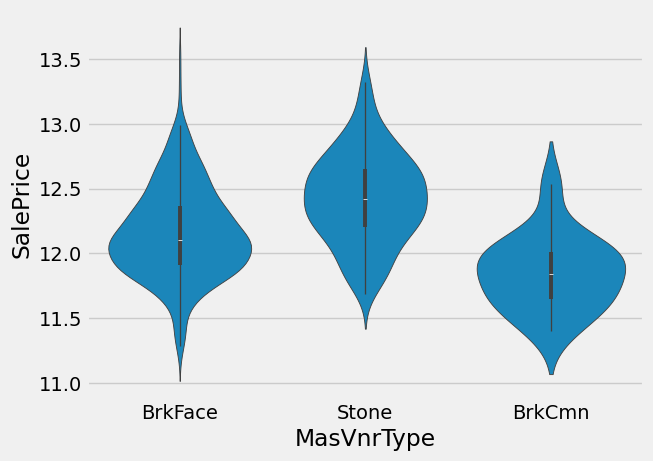

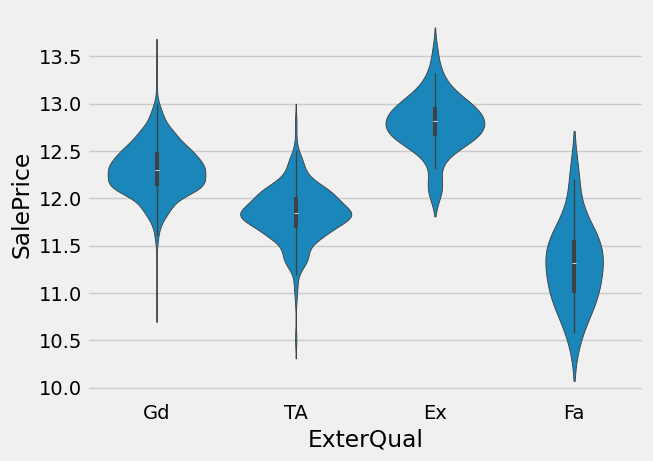

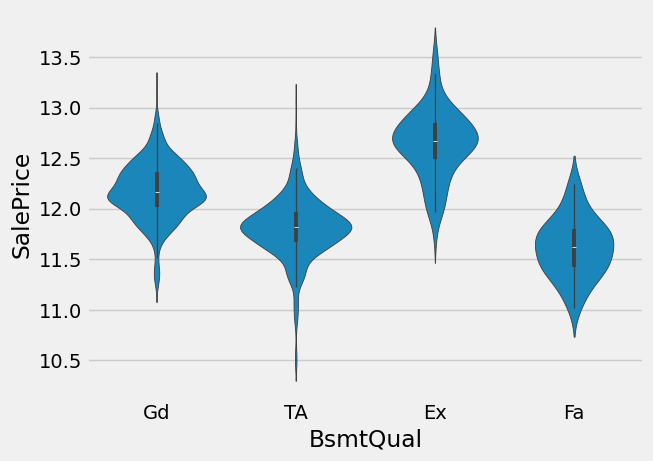

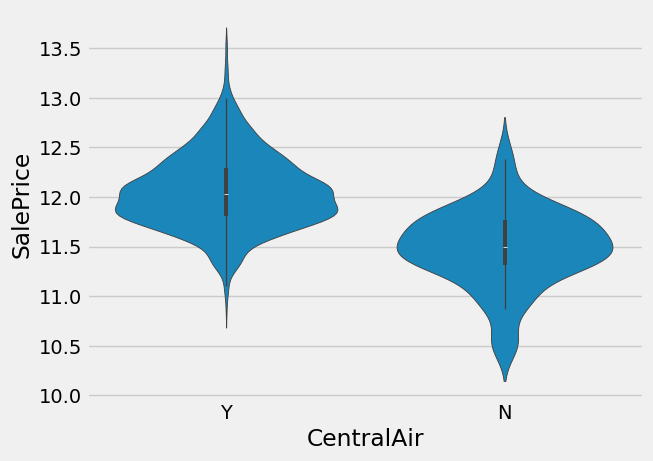

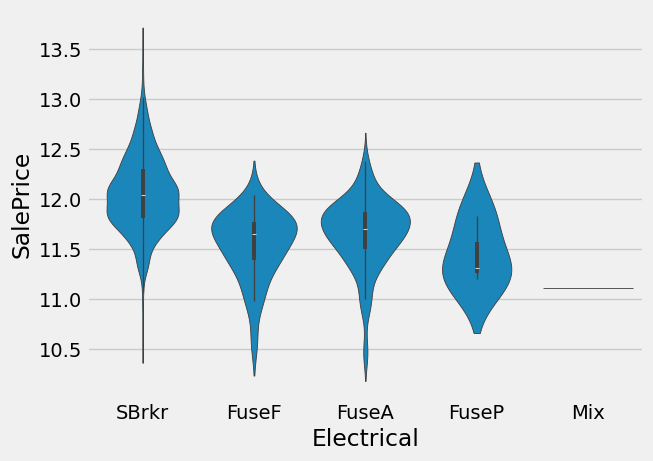

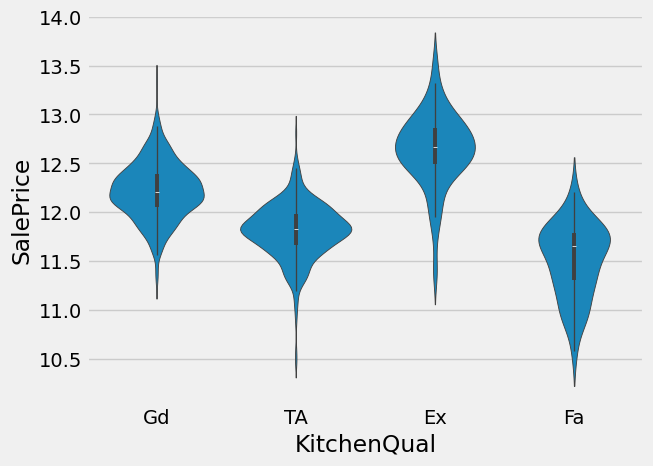

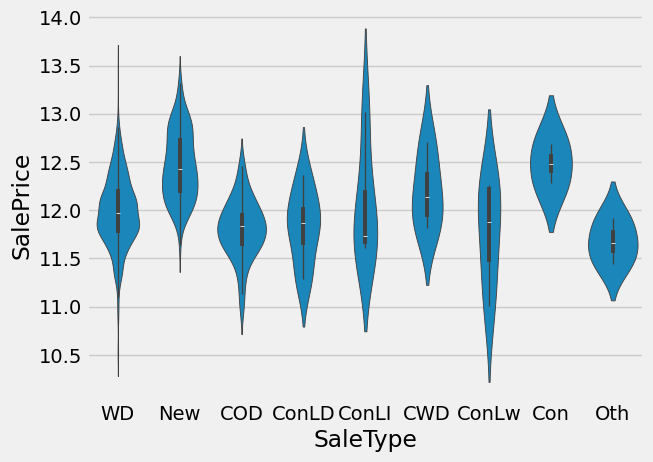

In [37]:
for li in strong_obj:
    sns.violinplot(x= li, y = target, data=train)
    plt.show()

In [38]:
numeric_features = df.dtypes[df.dtypes != "object"].index

In [39]:
from scipy.stats import skew 
skewness = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [40]:
high_skewness = skewness[abs(skewness) > 0.5]
skew_feat = high_skewness.index
print(high_skewness)
print(skew_feat)

MiscVal              21.919304
PoolArea             17.664161
haspool              15.473229
LotArea              13.167323
LowQualFinSF         12.067635
3SsnPorch            11.356127
LandSlope             4.987862
KitchenAbvGr          4.293726
BsmtFinSF2            4.169936
EnclosedPorch         4.021021
ScreenPorch           3.949857
BsmtHalfBath          3.923598
MasVnrArea            2.623822
OpenPorchSF           2.528620
WoodDeckSF            1.849679
Total_porch_sf        1.382622
Total_sqr_footage     1.248461
1stFlrSF              1.215511
LotFrontage           1.110062
GrLivArea             1.056757
BsmtFinSF1            0.983212
TotalSF               0.973652
BsmtUnfSF             0.914001
2ndFlrSF              0.852375
TotRmsAbvGrd          0.751009
Fireplaces            0.728641
HalfBath              0.693902
BsmtFullBath          0.625540
TotalBsmtSF           0.585973
OverallCond           0.563377
YearBuilt            -0.594996
GarageFinish         -0.611502
LotShape

In [41]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

MiscVal  PoolArea  haspool  LotArea  LowQualFinSF  3SsnPorch  LandSlope  \
0        0         0        0     8450             0          0          0   
1        0         0        0     9600             0          0          0   
2        0         0        0    11250             0          0          0   

   KitchenAbvGr  BsmtFinSF2  EnclosedPorch  ...  BsmtFinType2  GarageQual  \
0             1         0.0              0  ...             6           5   
1             1         0.0              0  ...             6           5   
2             1         0.0              0  ...             6           5   

   CentralAir  GarageCond  GarageYrBlt  hasgarage  Functional  hasbsmt  \
0           1           5       2003.0          1           6        1   
1           1           5       1976.0          1           6        1   
2           1           5       2001.0          1           6        1   

   Street  PoolQC  
0       1       3  
1       1       3  
2       1       3  

[3 rows x 52 columns]

In [42]:
from scipy.special import boxcox1p
lam = 0.15
for feat in skew_feat:
    df[feat] = boxcox1p(df[feat], lam)

In [43]:
df[['MiscVal', 'PoolArea', 'haspool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch',
       'ScreenPorch', 'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF',
       'WoodDeckSF', 'Total_porch_sf', '1stFlrSF', 'Total_sqr_footage',
       'LotFrontage', 'GrLivArea', 'TotalSF', 'BsmtFinSF1', 'BsmtUnfSF',
       '2ndFlrSF', 'TotRmsAbvGrd', 'Fireplaces', 'HalfBath', 'TotalBsmtSF',
       'BsmtFullBath', 'OverallCond', 'YearBuilt', 'GarageFinish', 'LotShape',
       'MoSold', 'Alley', 'BsmtExposure', 'KitchenQual', 'ExterQual', 'Fence',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BsmtFinType2', 'GarageQual',
       'CentralAir', 'GarageCond', 'GarageYrBlt', 'hasgarage', 'Functional',
       'hasbsmt', 'Street', 'PoolQC']].head(3)

MiscVal  PoolArea  haspool    LotArea  LowQualFinSF  3SsnPorch  LandSlope  \
0      0.0       0.0      0.0  19.212182           0.0        0.0        0.0   
1      0.0       0.0      0.0  19.712205           0.0        0.0        0.0   
2      0.0       0.0      0.0  20.347241           0.0        0.0        0.0   

   KitchenAbvGr  BsmtFinSF2  EnclosedPorch  ...  BsmtFinType2  GarageQual  \
0      0.730463         0.0            0.0  ...      2.259674    2.055642   
1      0.730463         0.0            0.0  ...      2.259674    2.055642   
2      0.730463         0.0            0.0  ...      2.259674    2.055642   

   CentralAir  GarageCond  GarageYrBlt  hasgarage  Functional   hasbsmt  \
0    0.730463    2.055642    14.187527   0.730463    2.259674  0.730463   
1    0.730463    2.055642    14.145138   0.730463    2.259674  0.730463   
2    0.730463    2.055642    14.184404   0.730463    2.259674  0.730463   

     Street    PoolQC  
0  0.730463  1.540963  
1  0.730463  1.540963  
2  0.730463  1.540963  

[3 rows x 52 columns]

In [44]:
df = pd.get_dummies(df)
print(df.shape)

(2909, 230)


In [45]:
# 중요변수 확인
new_train = df[:train.shape[0]]
new_test = df[train.shape[0]:]

In [46]:
new_train = pd.concat([new_train,target], axis=1, sort=False)

<Axes: >

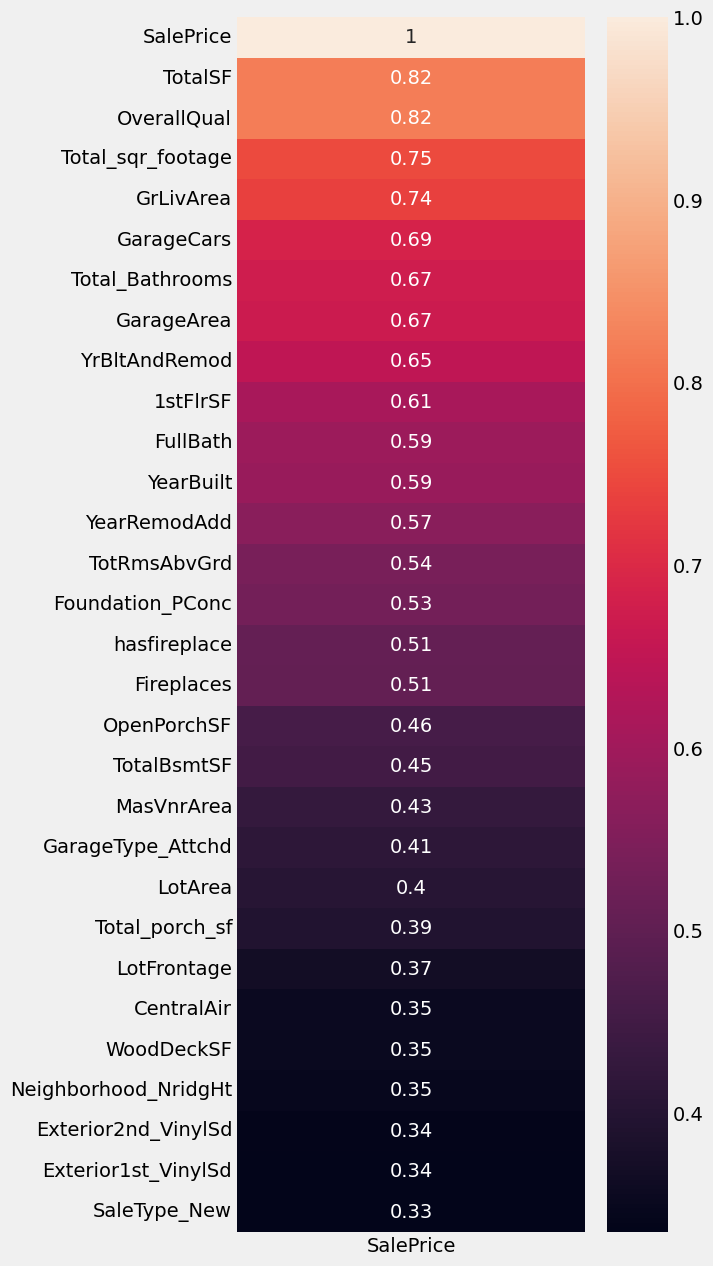

In [47]:
corr_new_train = new_train.corr()
plt.figure(figsize=(5,15))
sns.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],
                                ascending=False).head(30),annot=True)

In [48]:
col_corr_dict = corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()

In [49]:
best_columns=[]
for key,value in col_corr_dict.items():
    if ((value>=0.33) & (value<0.9)) | (value<=-0.325):
        best_columns.append(key)
print(len(best_columns))

39


In [50]:
new_train = new_train.drop(['SalePrice'], axis=1)
new_train = new_train.drop(['Id'], axis=1)
new_test = new_test.drop(['Id'], axis=1)

In [51]:
final_train = new_train[best_columns]
final_test = new_test[best_columns]
final_num = list(final_train.columns)

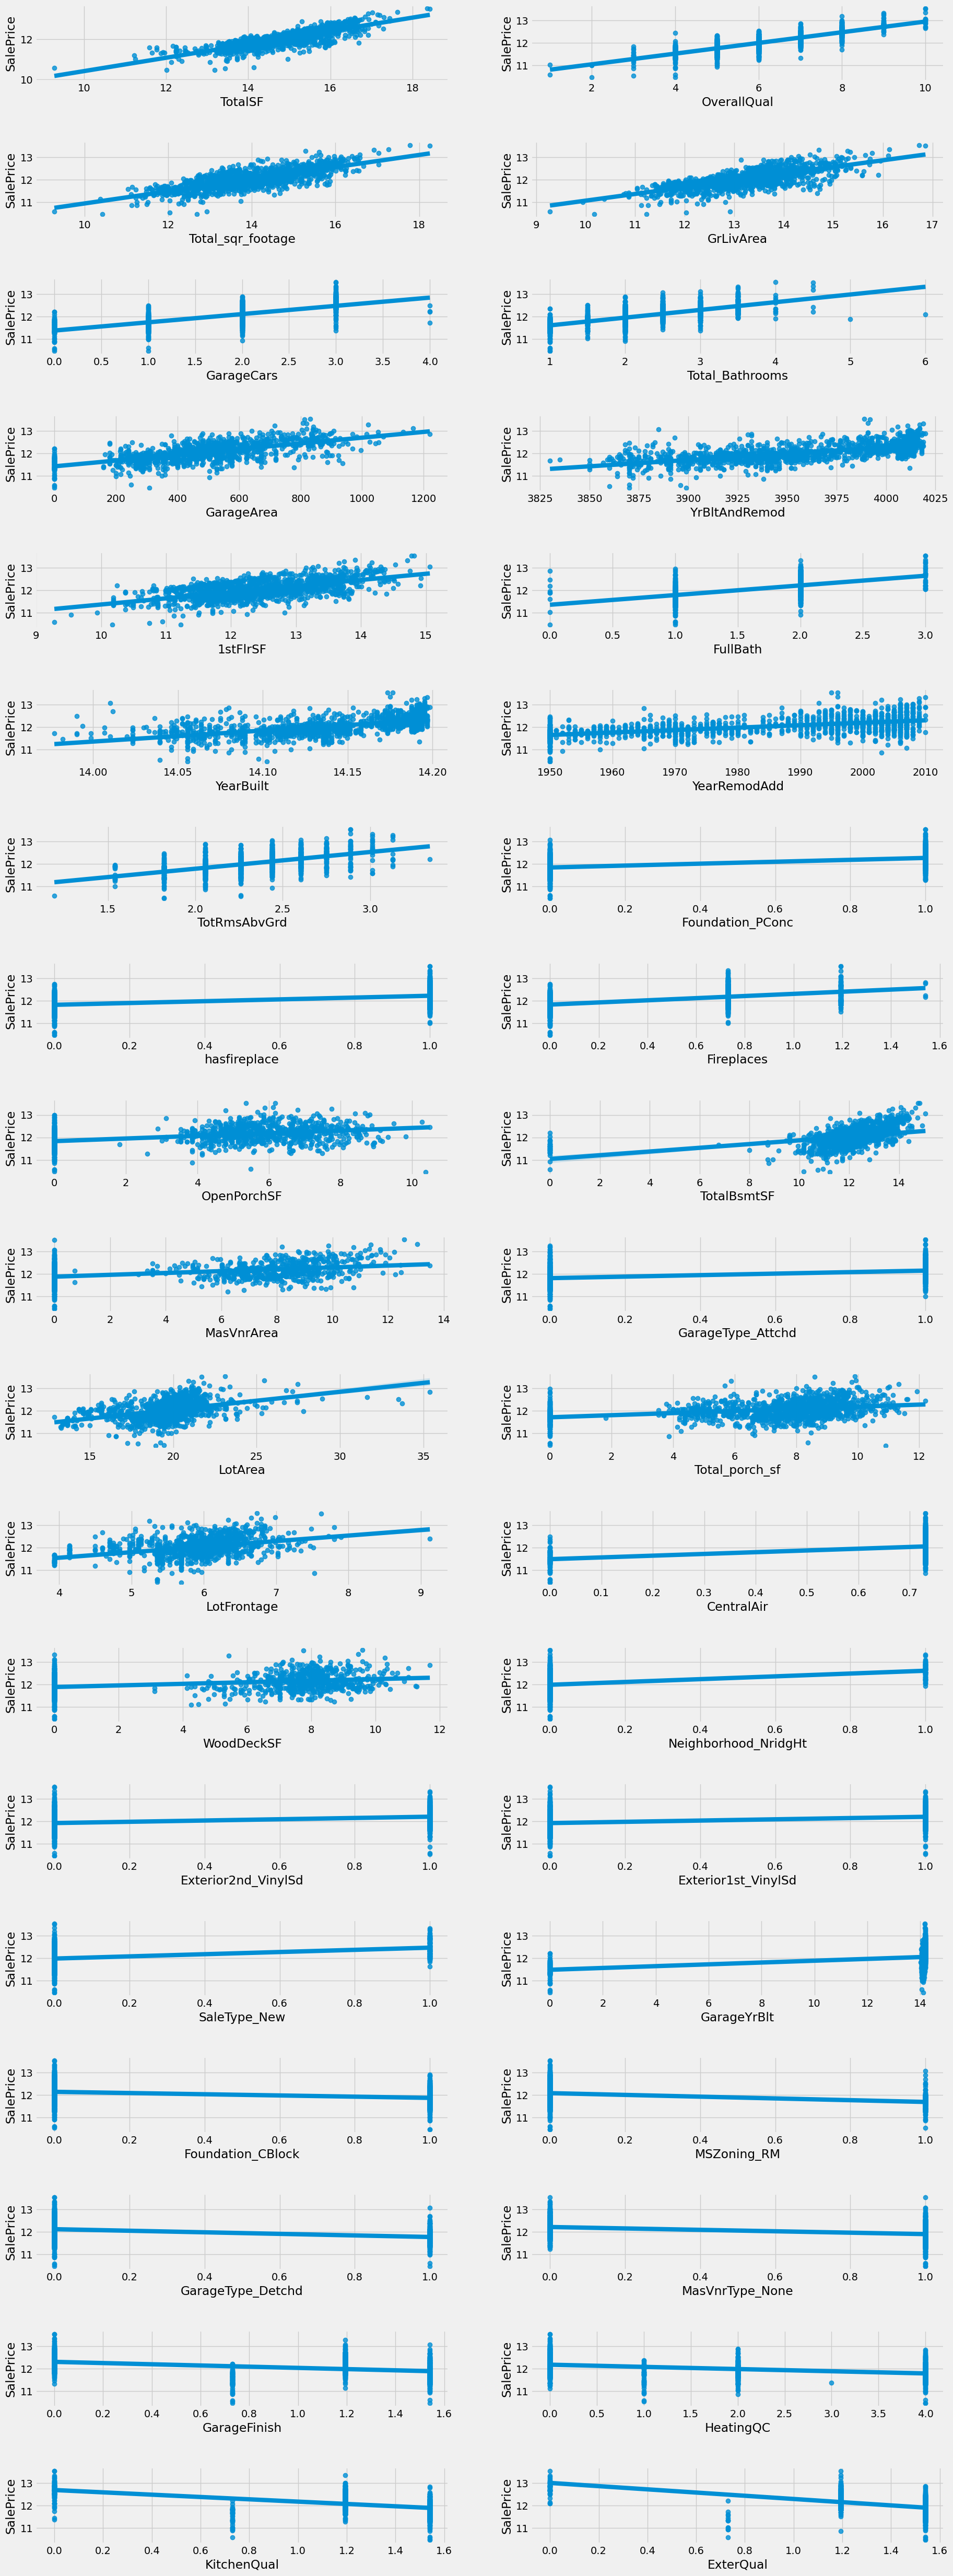

In [52]:
row = 19
col = 2

fig, axs = plt.subplots(row, col, figsize=(20, 60))
fig.subplots_adjust(hspace=0.8)

for r in range(0, row):
    for c in range(0, col):
        i = r * col + c
        if i < len(best_columns):
            sns.regplot(x=final_train[final_num[i]], y=target, fit_reg=True, marker='o', ax=axs[r][c])

In [53]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression


In [54]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [55]:
import statsmodels.api as sm

# 상수항 추가
final_train_with_const = sm.add_constant(final_train)

# OLS 모델 적합
model = sm.OLS(target.astype(float), final_train_with_const.astype(float)).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     334.1
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:15:40   Log-Likelihood:                 967.71
No. Observations:                1450   AIC:                            -1855.
Df Residuals:                    1410   BIC:                            -1644.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -651.7388    197.161     -3.306      0.001   -1038.499    -264.978
TotalSF                  0.0772      0.024      3.226      0.001       0.030       0.124
OverallQual              0.0770      0.005     16.593      0.000       0.068       0.086
Total_sqr_footage        0.0621      0.007      8.445      0.000       0.048       0.076
GrLivArea                0.0266      0.017      1.591      0.112      -0.006       0.059
GarageCars               0.0243      0.011      2.144      0.032       0.002       0.046
Total_Bathrooms          0.0151      0.009      1.716      0.086      -0.002       0.032
GarageArea            7.927e-05   3.74e-05      2.117      0.034    5.82e-06       0.000
YrBltAndRemod           -0.0945      0.029     -3.301      0.001      -0.151      -0.038
1stFlrSF                -0.0048      0.009     -0.559      0.576      -0.021       0.012
FullBath                -0.0039      0.011     -0.353      0.724      -0.026       0.018
YearBuilt               59.6217     17.930      3.325      0.001      24.449      94.794
YearRemodAdd             0.0964      0.029      3.362      0.001       0.040       0.153
TotRmsAbvGrd            -0.0263      0.022     -1.180      0.238      -0.070       0.017
Foundation_PConc         0.0372      0.016      2.292      0.022       0.005       0.069
hasfireplace            -0.0105      0.023     -0.450      0.653      -0.056       0.035
Fireplaces               0.0591      0.028      2.087      0.037       0.004       0.115
OpenPorchSF              0.0013      0.001      0.893      0.372      -0.002       0.004
TotalBsmtSF             -0.0043      0.004     -0.983      0.326      -0.013       0.004
MasVnrArea               0.0033      0.003      1.111      0.267      -0.003       0.009
GarageType_Attchd        0.0194      0.013      1.470      0.142      -0.006       0.045
LotArea                  0.0201      0.002      8.304      0.000       0.015       0.025
Total_porch_sf           0.0008      0.002      0.517      0.605      -0.002       0.004
LotFrontage              0.0080      0.008      1.022      0.307      -0.007       0.023
CentralAir               0.1455      0.022      6.619      0.000       0.102       0.189
WoodDeckSF               0.0020      0.001      1.644      0.100      -0.000       0.004
Neighborhood_NridgHt     0.0267      0.018      1.464      0.143      -0.009       0.062
Exterior2nd_VinylSd      0.0126      0.034      0.375      0.708      -0.054       0.079
Exterior1st_VinylSd     -0.0157      0.034     -0.469      0.639      -0.082       0.050
SaleType_New             0.0761      0.014      5.352      0.000       0.048       0.104
GarageYrBlt              0.0015      0.002      0.911      0.362      -0.002       0.005
Foundation_CBlock        0.0050      0.014      0.346    

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 결측치 처리
final_train = final_train.dropna()

# Ensure all data is numeric
final_train = final_train.select_dtypes(include=[np.number])

vif = pd.DataFrame()
vif['Features'] = final_train.columns
vif['VIF'] = [variance_inflation_factor(final_train.values, i) for i in range(final_train.shape[1])]
vif

Features            VIF
0             TotalSF   11179.074701
1         OverallQual      71.776543
2   Total_sqr_footage     934.091621
3           GrLivArea    4244.120729
4          GarageCars      41.871432
5     Total_Bathrooms      38.141209
6          GarageArea      32.940774
7       YrBltAndRemod  100078.348990
8            1stFlrSF     966.623297
9            FullBath      30.218172
10          YearBuilt   47943.069291
11       YearRemodAdd   42850.975699
12       TotRmsAbvGrd     242.559213
13       hasfireplace      25.971561
14         Fireplaces      25.560710
15        OpenPorchSF       3.987558
16        TotalBsmtSF     236.388758
17         MasVnrArea       2.276291
18            LotArea     191.964226
19     Total_porch_sf      12.625655
20        LotFrontage     185.557012
21         CentralAir      21.049876
22         WoodDeckSF       3.973474
23        GarageYrBlt      34.352080
24       GarageFinish       5.936516
25          HeatingQC       2.639501
26        KitchenQual      21.334684
27          ExterQual      43.320852
28           BsmtQual      12.397721

In [57]:
from sklearn.preprocessing import RobustScaler
rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(new_train)
test_rbst=rbst_scaler.transform(new_test)

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

kfold = KFold(n_splits=4)

random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))


In [59]:
reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = target,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))
    
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

/opt/anaconda3/envs/house/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/house/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.448370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4007
[LightGBM] [Info] Number of data points in the train set: 1088, number of used features: 146
[LightGBM] [Info] Start training from score 12.023929
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.361225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

/opt/anaconda3/envs/house/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/house/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


/opt/anaconda3/envs/house/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/house/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


CrossValMeans  CrossValerrors
0       0.376406             0.0
1       0.375934             0.0
2       0.135229             0.0
3       0.120265             0.0
4       0.133000             0.0
5       0.126112             0.0

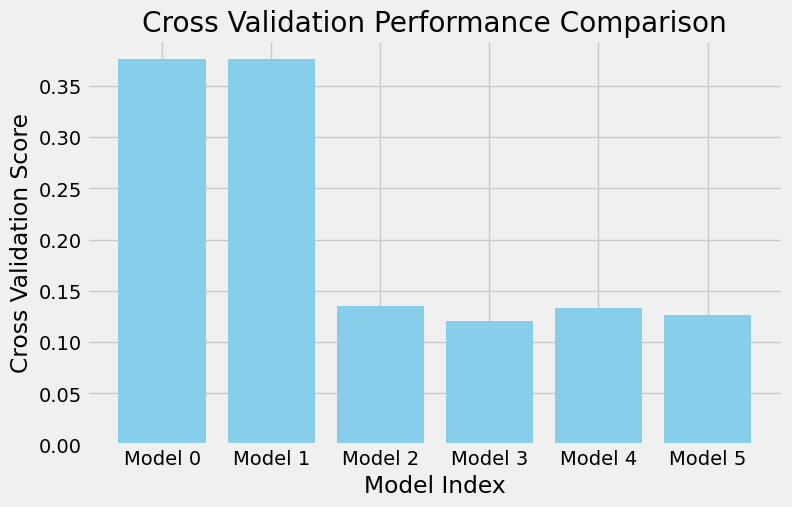

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터프레임 생성
df = pd.DataFrame({
    "CrossValMeans": [0.376406, 0.375934, 0.135229, 0.120265, 0.133000, 0.126112],
    "CrossValerrors": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
})

# 그래프 그리기
plt.figure(figsize=(8,5))
plt.bar(range(len(df["CrossValMeans"])), df["CrossValMeans"], color="skyblue")
plt.xticks(range(len(df["CrossValMeans"])), [f"Model {i}" for i in range(len(df))])
plt.xlabel("Model Index")
plt.ylabel("Cross Validation Score")
plt.title("Cross Validation Performance Comparison")
plt.show()

In [61]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,target)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 72 candidates, totalling 288 fits


np.float64(-0.01749912090013795)

In [62]:
# XGBoost 파라미터 튜닝 

XGB = XGBRegressor()
xgb_param_grid = {'learning_rate': [1,0.1,0.01,0.001],
              'n_estimators': [50, 100, 200, 500, 1000],
              'max_depth' : [1,3,5,10,50]}
gsXGB = GridSearchCV(XGB,param_grid = xgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsXGB.fit(X_rbst,target)
XGB_best = gsXGB.best_estimator_

# 최고 점수
gsXGB.best_score_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


np.float64(-0.013807720008952987)

In [63]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Train / Validation 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_rbst, target, test_size=0.2, random_state=42)

# LGBM 모델 (subsample 적용)
LGB = LGBMRegressor(subsample=0.8)

# 하이퍼파라미터 공간 최적화
lgb_param_grid = {
    'num_leaves': [30, 40, 50],  
    'learning_rate': [0.05, 0.01],  
    'n_estimators': [200, 300],  
    'max_depth': [10, 15, 20],
    'min_split_gain': [0.3, 0.4, 0.5]
}

# RandomizedSearchCV 실행 (속도 최적화)
rsLGB = RandomizedSearchCV(
    LGB, 
    param_distributions=lgb_param_grid, 
    n_iter=20,  # 탐색 횟수 줄임
    cv=3,  # 교차 검증 횟수 줄임
    scoring="neg_mean_squared_error", 
    n_jobs=-1,  
    verbose=1,
    random_state=42
)

# 모델 학습
rsLGB.fit(X_train, y_train)

# 최적의 모델
LGB_best = rsLGB.best_estimator_

# 최고 점수 출력
print("최고 점수:", rsLGB.best_score_)
print("최적 하이퍼파라미터:", rsLGB.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.245473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 773, number of used features: 135
[LightGBM] [Info] Start training from score 12.020246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.108452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 773, number of used features: 135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 9.461499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is no

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7d907a66d800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


Auto-choosing row-wise multi-threading, the overhead of testing was 12.178600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3571
[LightGBM] [Info] Number of data points in the train set: 774, number of used features: 133
[LightGBM] [Info] Start training from score 12.022573


Exception ignored on calling ctypes callback function: <function _log_callback at 0x78d2d2dd5800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function _log_callback at 0x7b556541d800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function _log_callback at 0x70a9204e1800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


Auto-choosing row-wise multi-threading, the overhead of testing was 12.013990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3571
Auto-choosing row-wise multi-threading, the overhead of testing was 12.347087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3571
[LightGBM] [Info] Number of data points in the train set: 774, number of used features: 133
[LightGBM] [Info] Number of data points in the train set: 774, number of used features: 133
[LightGBM] [Info] Start training from score 12.022573
[LightGBM] [Info] Start training from score 12.022573
Auto-choosing row-wise multi-threading, the overhead of testing was 11.937093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

Exception ignored on calling ctypes callback function: <function _log_callback at 0x7a2c69b55800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 
Exception ignored on calling ctypes callback function: <function _log_callback at 0x7efdc18ad800>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/house/lib/python3.12/site-packages/lightgbm/basic.py", line 287, in _log_callback
    def _log_callback(msg: bytes) -> None:
    
KeyboardInterrupt: 


[LightGBM] [Info] Number of data points in the train set: 774, number of used features: 133
[LightGBM] [Info] Start training from score 12.022573
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

KeyboardInterrupt: 

In [2]:
print("최적 하이퍼파라미터:", rsLGB.best_params_)

NameError: name 'rsLGB' is not defined

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 최적 모델로 예측
y_train_pred = LGB_best.predict(X_train)
y_valid_pred = LGB_best.predict(X_valid)

# RMSE 계산 (squared 옵션 대신 np.sqrt 사용)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))

print(f"훈련 데이터 RMSE: {rmse_train:.5f}")
print(f"검증 데이터 RMSE: {rmse_valid:.5f}")

NameError: name 'LGB_best' is not defined